# Analysis of Nobel prize winners

Welcome to the programming example page. This page shows an example analysis of Nobel prize winners. The coding commands and techniques that are demonstarted in this analysis are similar to those that are needed for your particle physics analysis.


<b>IMPORTANT</b>: For every code box with code already in it, like the one below you must click in and press control+enter to run the code. This is how you also run your own code. 

If the In [x]: to the left of a codebox changes to In [*]: that means the code in that box is currently running

If you ever want more space to display output of code you can press the + button  in the toolbar to the right of the save button to create another input box!

For the sliders in the example histograms to work you will have to run all the codeboxes in this notebook. You can either do this as you read and try changing the code to see what happens, or select cell in the toolbar at the top and select run all.

First we load in the libraries we require and read in the file that contains the data.

In [20]:
import pandas 
import math
from ipywidgets import interact
%pylab inline
pandas.options.mode.chained_assignment = None 

Populating the interactive namespace from numpy and matplotlib


In [21]:
dataFrame = pandas.read_csv('nobel.csv',',') #Getting the data into a panda DataFrame
#The data you will work with will not be in .csv form, but can use DataFrame(Array) to do the same thing

Lets now view the first few lines of the data table. The rows of the data table are each of the Nobel prizes awarded and the columns are the information about who won the prize.   

We have put the data into a pandas DataFrame we can now use all the functions associated with DataFrames. A useful function is *.head()*, this prints out the first few lines of the data table. You can look up the full range of functions in the pandas reference web pages, for DataFrame it is [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

In [22]:
dataFrame.head(5) #Displaying some of the data so you can see what form it takes in the DataFrame


,Year,Category,Name,Birthdate,Birth Place,County,Residence,Role/Affiliate,Field/Language,Prize Name,Motivation
0,1901,chemistry,Jacobus Henricus van 't Hoff,30 August 1852,Rotterdam,the Netherlands,No Data,"Berlin University, Berlin, Germany","Physical chemistry, chemical kinetics",The Nobel Prize in Chemistry,The Nobel Prize in Chemistry 1901 was awarded ...
1,1901,literature,Sully Prudhomme,16 March 1839,Paris,France,France,No Data,French,The Nobel Prize in Literature,The Nobel Prize in Literature 1901 was awarded...
2,1901,medicine,Emil Adolf von Behring,15 March 1854,Hansdorf (now Jankowa ?aga?ska),Prussia (now Poland),No Data,"Marburg University, Marburg, Germany",No Data,The Nobel Prize in Physiology or Medicine,The Nobel Prize in Physiology or Medicine 1901...
3,1901,peace,Frédéric Passy,20 May 1822,Paris,France,France,Founder and President of first French peace s...,"Humanitarian work, peace movement",The Nobel Peace Prize,The Nobel Peace Prize 1901 was awarded jointly...
4,1901,peace,Jean Henry Dunant,8 May 1828,Geneva,Switzerland,Switzerland,Originator Geneva Convention (Convention de G...,"Humanitarian work, peace movement",The Nobel Peace Prize,The Nobel Peace Prize 1901 was awarded jointly...


# Plotting a histogram

Lets learn how to plot histograms. We will plot the number of prizes awarded per year. Nobel prizes can be awarded for up to three people per category. As each winner is recorded as an individual entry the histogram will tell us if there has been a trend of increasing or decreasing multiple prize winners in one year.

However before we plot the histogram we should find information out about the data so that we can check the range of the data we want to plot.

In [23]:
dataFrame.min() # returns the first entry in the data

Year                                                           1901
Category                                                  chemistry
Name                                              A. Michael Spence
Birthdate                                                    0 1898
Birth Place                                                     inf
County                                                      Algeria
Residence                                                       inf
Role/Affiliate                                                  inf
Field/Language                 Accelerator physics, instrumentation
Prize Name                                    The Nobel Peace Prize
Motivation        The Nobel Peace Prize 1901 was awarded jointly...
dtype: object

In [24]:
dataFrame.max() # returns the final entry in the data

Year                                                           2010
Category                                                    physics
Name                                                  élie Ducommun
Birthdate                                                   No Data
Birth Place                                               the Hague
County                                              the Netherlands
Residence                                           the Netherlands
Role/Affiliate                                              No Data
Field/Language                                              No Data
Prize Name                           The Prize in Economic Sciences
Motivation        The Sveriges Riksbank Prize in Economic Scienc...
dtype: object

The data set also contains entries for economics. Economics was not one of the original Nobel prizes and has only been given out since 1969. If we want to do a proper comparison we will need to filter this data out. We can do this with a pandas query. We can then check there are no economics prizes left by using a .tail() function.

In [25]:
# Filter out the Economics prizes from the data
NoEconomics = "Category != 'economics'"
noEconomicsDataFrame = dataFrame.query(NoEconomics)
noEconomicsDataFrame.tail(3)

,Year,Category,Name,Birthdate,Birth Place,County,Residence,Role/Affiliate,Field/Language,Prize Name,Motivation
836,2010,peace,Liu Xiaobo,No Data,NaN,No Data,China,No Data,Human rights,The Nobel Peace Prize,The Nobel Peace Prize 2010 was awarded to Liu ...
837,2010,physics,Andre Geim,1958,Sochi,Russia,No Data,"University of Manchester, Manchester, United ...",No Data,The Nobel Prize in Physics,The Nobel Prize in Physics 2010 was awarded jo...
838,2010,physics,Konstantin Novoselov,1974,Nizhny Tagil,Russia,No Data,"University of Manchester, Manchester, United ...",No Data,The Nobel Prize in Physics,The Nobel Prize in Physics 2010 was awarded jo...


We can now plot the histogram over a sensible range using the hist function from matplot lib.

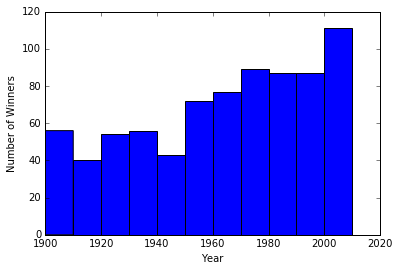

In [26]:
#Plot the histogram of number of winners against year
H_WinnersPerYear = hist(noEconomicsDataFrame['Year'], bins=11, range=[1900,2010]) 
xlabel('Year') #Plot an x label
ylabel('Number of Winners') #Plot a y label


From the histogram we can see that there has been a recent trend of more multiple prize winners in the same year. However there is a drop in the range 1940 - 1950, this was due to prizes being awarded intermittently during World War II. To isolate this gap we can change the bin size (by changing the number of bins variable) to contain this range. Try changing the slider below (you will have to click in code box and press control + enter to activate it) and see how the number of bins affects the look of the histogram.

3.0


<function __main__.plthist>

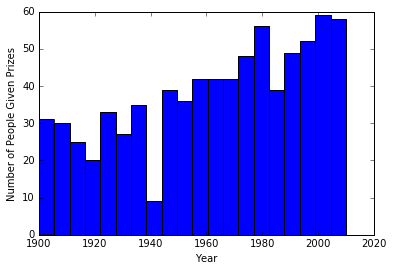

In [12]:
def plthist(bins): 
    changingBins = hist(noEconomicsDataFrame['Year'], bins=bins, range=[1900,2010])
    xlabel('Year') #Plot an x label
    ylabel('Number of People Given Prizes') #Plot a y label
    BinSize = round(float(60)/bins,2)
    print(BinSize)
    pass

interact(plthist,bins = [10,30,1])


As you can see by varying the slider - changing the bin size really does change how the data looks! There is discussion on what is the appropiate bin size to use in the main notebook.

## Pre-selections

We now want to pre-select our data. This is the same process as with filtering out economics prizes before but we'll go into more detail. This time lets filter out everything except Physics. We could do so by building a new dataset from the old one with loops and if statements, but the inbuilt pandas function .query() provides a quicker way. By passing a conditional statement, formatted into a string, we can create a new dataframe which is filled with only data that made the conditional statement true. A few examples are given below but only filtering out all but physics is used.

In [28]:
# Example filters for the data set
modernPhysics = "(Category == 'physics' && Year > 2005)" #Integer values don't go inside quotes! Just like normal conditionals
physicsOnly = "(Category == 'physics')"
# apply the physicsOnly query
physicsOnlyDataFrame = dataFrame.query(physicsOnly)

Lets check the new DataFrames to see if this has worked!

In [12]:
physicsOnlyDataFrame.head()

,Year,Category,Name,Birthdate,Birth Place,County,Residence,Role/Affiliate,Field/Language,Prize Name,Motivation
5,1901,physics,Wilhelm Conrad Röntgen,27 March 1845,Lennep (now Remscheid),Prussia (now Germany),No Data,"Munich University, Munich, Germany","X-rays, atomic physics",The Nobel Prize in Physics,The Nobel Prize in Physics 1901 was awarded to...
11,1902,physics,Hendrik Antoon Lorentz,18 July 1853,Arnhem,the Netherlands,No Data,"Leiden University, Leiden, the Netherlands","Atomic physics, quantum physics",The Nobel Prize in Physics,The Nobel Prize in Physics 1902 was awarded jo...
12,1902,physics,Pieter Zeeman,25 May 1865,Zonnemaire,the Netherlands,No Data,"Amsterdam University, Amsterdam, the Netherlands","Atomic physics, quantum physics",The Nobel Prize in Physics,The Nobel Prize in Physics 1902 was awarded jo...
17,1903,physics,Antoine Henri Becquerel,15 December 1852,Paris,France,No Data,"école Polytechnique, Paris, France",Nuclear physics,The Nobel Prize in Physics,"The Nobel Prize in Physics 1903 was divided, o..."
18,1903,physics,"Marie Curie, née Sklodowska",7 November 1867,Warsaw,Russian Empire (now Poland),No Data,NaN,Nuclear physics,The Nobel Prize in Physics,"The Nobel Prize in Physics 1903 was divided, o..."


Brilliant! You will find this technique useful to selection kaons in the main analysis. Lets now plot the number of winners per year just for physics.

You may be wondering why the indexes are not sequentially ordered. This is due to how .query() took the data from the previous data frame.

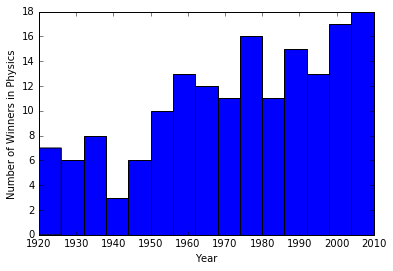

In [31]:
H_PhysicsWinnersPerYear = hist(physicsOnlyDataFrame['Year'].values,bins = 15,range = [1920,2010]) #plot the non-biased distribution!
#.values is needed due to a quirk of how pandas.query works. More information below.
xlabel('Year') #Plot an x label
ylabel('Number of Winners in Physics') #Plot a y label

We have now successfully plotted the histogram of just the physics prizes after applying our pre-selection. Why did we have to do...
>hist(physicsOnlyDataFrame['Year'].values

This (and the associated indexing weirdness) comes from the fact that when we apply .query to our original DataFrame creating the new physicsOnlyDataFrame there isn't a process of copying the entries. Instead the new dataFrame just points to the values in the old one. This can lead to problems when using non-pandas functions that aren't ready to handle data where the first array index is not [0]. Using .values before the histogram avoids this problem.

# Calculations, Scatter Plots and 2D Histogram
### Adding New Data to a Data Frame

You will find this section useful for when it comes to creating a Dalitz plot in the particle physics analysis.

We want to see what ages people have been awarded Nobel prizes and measure the spread in the ages.

Then we'll consider if over time people have been getting awarded Nobel prizes earlier or later in their life. 

First we'll need to calculate the age or the winners at the time the prize was awarded based on the Year and Birthdate columns. We create an AgeAwarded variable and add this to the data.

Don't worry about the string cutting code in *parse_year* if you don't understand it as you won't need it for the main analysis. Just observe how you can add new columns to the data frame and apply functions.

In [33]:
def parse_year(s):
    if s[-3] == '-':
        return int('19' + s[-2:])
    elif s[-4:] == 'Data':   #If there is a value of no data set the age to something
        return 1000          #Large that we can filter later
    else:
        return int(s[-4:])

birthdateString = physicsOnlyDataFrame['Birthdate'].apply(parse_year)
physicsOnlyDataFrame['BirthYear'] = birthdateString
physicsOnlyDataFrame['AgeAwarded'] = physicsOnlyDataFrame['Year'] - physicsOnlyDataFrame['BirthYear'] #Create new variable in the dataframe
physicsOnlyDataFrame = physicsOnlyDataFrame.query("AgeAwarded < 200") #This filters out the no Data replaced data!
physicsOnlyDataFrame.head()

,Year,Category,Name,Birthdate,Birth Place,County,Residence,Role/Affiliate,Field/Language,Prize Name,Motivation,BirthYear,AgeAwarded
5,1901,physics,Wilhelm Conrad Röntgen,27 March 1845,Lennep (now Remscheid),Prussia (now Germany),No Data,"Munich University, Munich, Germany","X-rays, atomic physics",The Nobel Prize in Physics,The Nobel Prize in Physics 1901 was awarded to...,1845,56
11,1902,physics,Hendrik Antoon Lorentz,18 July 1853,Arnhem,the Netherlands,No Data,"Leiden University, Leiden, the Netherlands","Atomic physics, quantum physics",The Nobel Prize in Physics,The Nobel Prize in Physics 1902 was awarded jo...,1853,49
12,1902,physics,Pieter Zeeman,25 May 1865,Zonnemaire,the Netherlands,No Data,"Amsterdam University, Amsterdam, the Netherlands","Atomic physics, quantum physics",The Nobel Prize in Physics,The Nobel Prize in Physics 1902 was awarded jo...,1865,37
17,1903,physics,Antoine Henri Becquerel,15 December 1852,Paris,France,No Data,"école Polytechnique, Paris, France",Nuclear physics,The Nobel Prize in Physics,"The Nobel Prize in Physics 1903 was divided, o...",1852,51
18,1903,physics,"Marie Curie, née Sklodowska",7 November 1867,Warsaw,Russian Empire (now Poland),No Data,NaN,Nuclear physics,The Nobel Prize in Physics,"The Nobel Prize in Physics 1903 was divided, o...",1867,36


Lets make a plot of the age of the winners at the time they were awarded the prize

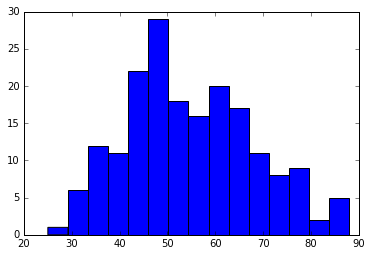

In [34]:
H_AgeAwarded = hist(physicsOnlyDataFrame['AgeAwarded'].values,bins = 15) #plot a histogram of the laureates ages

### Making Calculations

Lets calculate a measure of the spread in ages of the laureates. We will calculate the standard deviation of the distribution.

In [67]:
# count number of entries
NumEntries=physicsOnlyDataFrame['AgeAwarded'].count()
# calculate square of ages
physicsOnlyDataFrame['AgeAwardedSquared']=physicsOnlyDataFrame['AgeAwarded']**2
# calculate sum of square of ages, and sum of ages
AgeSqSum=physicsOnlyDataFrame['AgeAwardedSquared'].values.sum()
AgeSum=physicsOnlyDataFrame['AgeAwarded'].values.sum()
# calculate std and print it
std = sqrt((AgeSqSum-(AgeSum**2/NumEntries))/NumEntries)
print std

13.3041346957


There is actually a function that would calculate the rms for you, but we wanted to teach you how to manipulate data to make calculations!

In [45]:
print physicsOnlyDataFrame['AgeAwarded'].values.std() # calculates standard deviation (rms) of distribution

13.3145243715


### Scatter Plot

Now lets plot a scatter plot of Age vs Date awarded

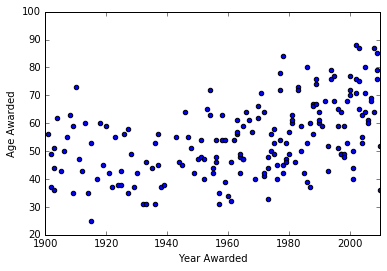

In [69]:
scatter(physicsOnlyDataFrame['Year'].values,physicsOnlyDataFrame['AgeAwarded'].values)
plt.xlim(1900, 2010) #change the area of the plot
plt.ylim(20, 100)
xlabel('Year Awarded')
ylabel('Age Awarded')


### 2D Histogram

We can also plot a 2D histogram and bin the results. The number of entries in the data set is relatively low so we will need to use reasonably large bins to have acceptable statistics in each bin. We have given you the ability to change the number of bins so you can see how the plot changes. Note that the number of total bins is the value of the slider squared. This is because the value of bins given in the hist2d function is the number of bins on one axis.

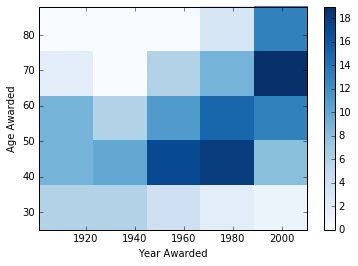

<function __main__.plthist>

In [68]:
def plthist(bins):
    hist2d(physicsOnlyDataFrame['Year'].values,physicsOnlyDataFrame['AgeAwarded'].values, bins=bins, cmap = 'Blues')#Plot the 2d histogram
   
    colorbar() #Set a colour legend
    xlabel('Year Awarded')
    ylabel('Age Awarded')
    show()
    
    
interact(plthist,bins = [1,10,1]) #Creates the slider

Playing with the slider will show you the effect of changing bthe in size in a 2D histogram. The darker bins in the top right corner show that there does appear to be a trend of Nobel prizes being won at an older age in more recent years.

## Conditional Summation

One final thing that will be useful for you to know is how to count the number of rows in a table that satisfy a given condition (namely for the summing of the particles with positive or negative charge).

For this example lets count the number of Nobel laureates for the different prizes.

In [17]:
ListOfCategories = dataFrame.Category
#The .Category turns the dataFrame into a list of just categories
#We can then use numpy.sum() on the list
TotalEconomics = numpy.sum(ListOfCategories == 'economics')
TotalChemistry = numpy.sum(ListOfCategories == 'chemistry')
TotalPhysics = numpy.sum(ListOfCategories == 'physics')
print('Economics: ' + str(TotalEconomics) + ' Chemistry: ' + str(TotalChemistry) + ' Physics: ' + str(TotalPhysics))

Economics: 67 Chemistry: 160 Physics: 189
